In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BASE_PATH = '../../best_model'

In [3]:
df = pd.read_csv(f'{BASE_PATH}/evaluation_results.csv', header=0, index_col=0)

In [4]:
df

,rewards_per_run_RecurrentPPO_MlpLstmPolicy,episode_lenghts_RecurrentPPO_MlpLstmPolicy
0,-22.606836,42
1,-3.779257,37
2,-6.468944,64
3,-5.237395,64
4,-8.071042,110
5,-2.203216,38
6,-2.972777,50
7,-5.869940,96
8,-2.340698,40
9,-2.432105,41


In [5]:
eposide_len_cols = [col for col in df.columns if 'episode_lenghts' in col]
rewards_cols = [col for col in df.columns if 'rewards' in col]

In [6]:
episode_lengths = df[eposide_len_cols]
rewards = df[rewards_cols]

episode_lengths.columns = [col.replace('episode_lenghts_', '') for col in episode_lengths.columns]
rewards.columns = [col.replace('rewards_per_run_', '') for col in rewards.columns]

In [7]:
rewards

,RecurrentPPO_MlpLstmPolicy
0,-22.606836
1,-3.779257
2,-6.468944
3,-5.237395
4,-8.071042
5,-2.203216
6,-2.972777
7,-5.869940
8,-2.340698
9,-2.432105


In [8]:
mean_rewards = rewards.mean(axis=0).sort_values(ascending=False)
pd.DataFrame(mean_rewards)

,0
RecurrentPPO_MlpLstmPolicy,-6.198221


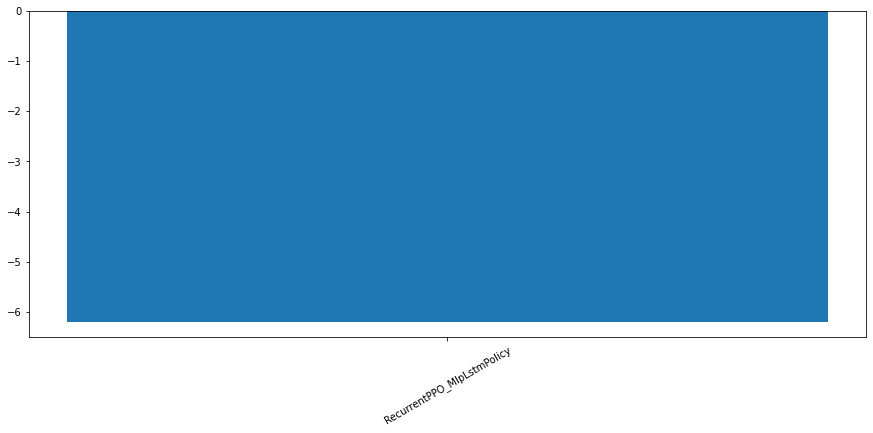

In [9]:
plt.figure(figsize=(15, 6))
plt.bar(x=[x for x in range(len(mean_rewards.index))], height=mean_rewards)
plt.xticks(range(len(mean_rewards.index)), mean_rewards.index, rotation=30)
plt.show()


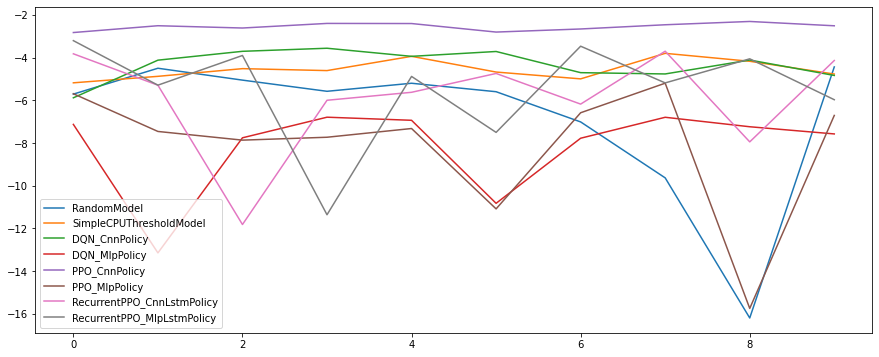

In [180]:
plt.figure(figsize=(15, 6))
plt.plot(rewards)
plt.legend(rewards.columns)
plt.show()

In [181]:
episode_lengths

,RandomModel,SimpleCPUThresholdModel,DQN_CnnPolicy,DQN_MlpPolicy,PPO_CnnPolicy,PPO_MlpPolicy,RecurrentPPO_CnnLstmPolicy,RecurrentPPO_MlpLstmPolicy
0,70,84,104,114,36,156,47,29
1,52,76,88,239,54,190,75,47
2,56,78,82,144,32,196,87,36
3,81,78,74,110,31,190,63,55
4,72,75,104,144,30,184,64,41
5,53,84,85,220,34,233,70,43
6,68,84,87,161,28,173,61,41
7,141,75,96,144,30,150,51,41
8,152,76,90,144,27,270,61,48
9,52,84,90,144,29,161,58,40


In [182]:
mean_episode_lengths = episode_lengths.mean(axis=0).sort_values(ascending=False)
pd.DataFrame(mean_episode_lengths)

,0
PPO_MlpPolicy,190.3
DQN_MlpPolicy,156.4
DQN_CnnPolicy,90.0
RandomModel,79.7
SimpleCPUThresholdModel,79.4
RecurrentPPO_CnnLstmPolicy,63.7
RecurrentPPO_MlpLstmPolicy,42.1
PPO_CnnPolicy,33.1


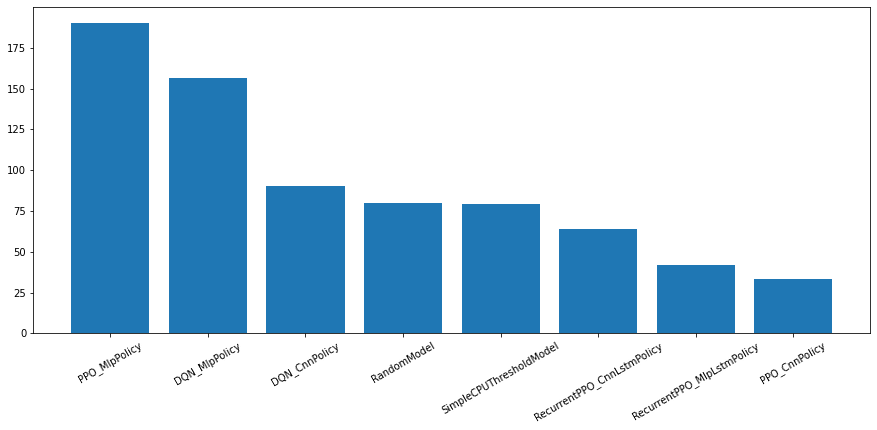

In [183]:
plt.figure(figsize=(15, 6))
plt.bar(x=[x for x in range(len(mean_episode_lengths.index))], height=mean_episode_lengths)
plt.xticks(range(len(mean_episode_lengths.index)), mean_episode_lengths.index, rotation=30)
plt.show()


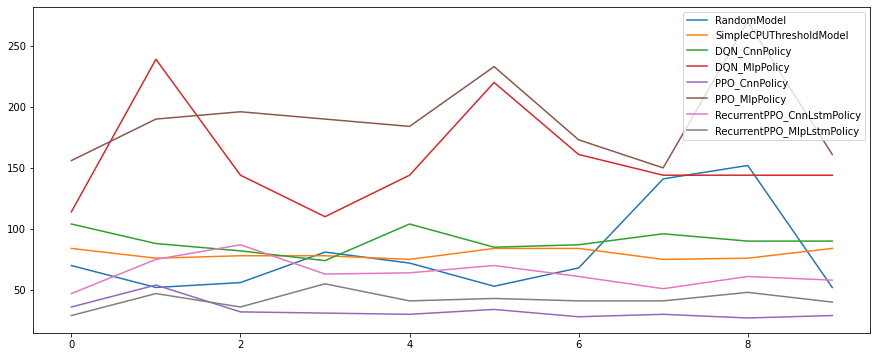

In [184]:
plt.figure(figsize=(15, 6))
plt.plot(episode_lengths)
plt.legend([col.replace('episode_lenghts_', '') for col in episode_lengths.columns])
plt.show()